In [6]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap, colors

from theory.models.constants import G_0_muS

from theory.models.hamiltonian_approach import get_I_nA as get_I_nA_HA

from tqdm import tqdm

In [ ]:
Delta_meV = 0.2  # meV
Gamma_meV = 1e-5  # meV
T_K = 0.0  # K
taus = np.concatenate(
    (
        np.linspace(0.01, 0.04, 4),
        np.linspace(0.05, 0.90, 18),
        np.linspace(0.95, 0.99, 5),
        np.array([0.995]),
    )
)
V_mV = np.linspace(0, 2.5 * Delta_meV, 2501)

I_nA = np.full((taus.shape[0], V_mV.shape[0]), np.nan)

In [22]:
for i, tau in enumerate(tqdm(taus)):
    I_nA[i, :] = get_I_nA_HA(
        V_mV=V_mV,
        tau=tau,
        T_K=T_K,
        Delta_meV=np.array([Delta_meV, Delta_meV]),
        Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
    )
dIdV_G0 = np.gradient(I_nA, V_mV, axis=1) / G_0_muS

100%|██████████| 28/28 [18:34<00:00, 39.79s/it]


Text(0, 0.5, 'd$I/$d$V\\ (G)$')

<Figure size 640x480 with 0 Axes>

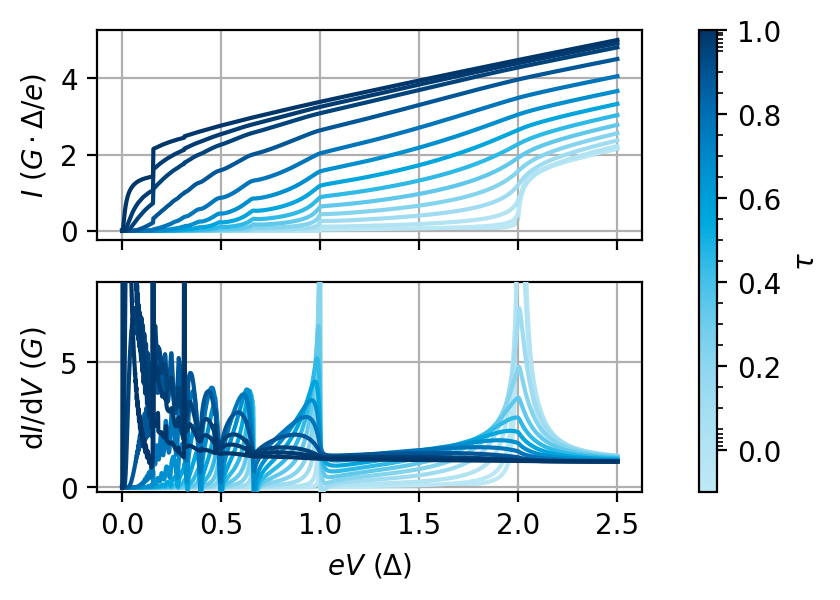

In [23]:
%matplotlib inline
from torch import inverse


plt.figure(1)
fig, axs = plt.subplots(figsize=(4,3), ncols=2, nrows=2, dpi=200,
        gridspec_kw={"width_ratios":[5.8,.2]})
gs = axs[0,1].get_gridspec()
ax11 = axs[0,0]
ax12 = axs[1,0]

black_lim = .1

t, _ = np.meshgrid(taus, np.ones_like(taus))
# cmap = cmap(inverse=True, clim=[.1, .8])
tau_map = cmap(clim=[.1, .8], inverse=True)
im = axs[0,1].imshow(t, cmap = tau_map, clim=(1, 0))

axs[0,1].remove()
axs[1,1].remove()
ax_clb = fig.add_subplot(gs[:,-1])
cbar=fig.colorbar(im, label=r'$\tau$', cax=ax_clb)
ax_clb.set_yticks(taus, minor=True)

for i, tau in enumerate(taus):
    if i%2==1:
        ax11.plot(V_mV/Delta_meV, I_nA[i,:] / G_0_muS /tau / Delta_meV, '-',label=f'{tau:0.03}', zorder=i, color=tau_map(tau))
        ax12.plot(V_mV/Delta_meV, dIdV_G0[i,:]/tau, '-',label=f'{tau:0.03}', zorder=i, color=tau_map(tau))

ax11.set_xticklabels([])
ax11.grid()
ax12.grid()
# ax11.set_xlim(-0.1,2.6)
# ax12.set_xlim(-0.1,2.6)
# ax11.set_ylim(-0.1,5.1)
ax12.set_ylim(-0.2,8.2)

ax11.set_ylabel(r'$I\ (nA)$')
ax11.set_ylabel(r'$I\ (G \cdot \Delta/e)$')
ax12.set_xlabel(r'$eV\ (\Delta)$')
# ax12.set_ylabel(r'd$I/$d$V\ (G_0)$')
ax12.set_ylabel(r'd$I/$d$V\ (G)$')

In [24]:
fig.savefig("mar-iv.pgf")
fig.savefig("mar-iv.pdf")